In [1]:
import numpy as np
import pyfits
import math
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats
fi = pyfits.open("nsa_wise_v0_2_1.fits")
dat = fi[1].data

In [2]:
dat.columns

ColDefs(
    name = 'IAUNAME'; format = '19A'
    name = 'SUBDIR'; format = '27A'
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'ISDSS'; format = 'J'
    name = 'INED'; format = 'J'
    name = 'ISIXDF'; format = 'J'
    name = 'IALFALFA'; format = 'J'
    name = 'IZCAT'; format = 'J'
    name = 'ITWODF'; format = 'J'
    name = 'MAG'; format = 'E'
    name = 'Z'; format = 'E'
    name = 'ZSRC'; format = '7A'
    name = 'SIZE'; format = 'E'
    name = 'RUN'; format = 'I'
    name = 'CAMCOL'; format = 'B'
    name = 'FIELD'; format = 'I'
    name = 'RERUN'; format = '3A'
    name = 'XPOS'; format = 'E'
    name = 'YPOS'; format = 'E'
    name = 'ZLG'; format = 'E'
    name = 'ZDIST'; format = 'E'
    name = 'ZDIST_ERR'; format = 'E'
    name = 'NSAID'; format = 'J'
    name = 'NMGY'; format = '7E'
    name = 'NMGY_IVAR'; format = '7E'
    name = 'OK'; format = 'I'
    name = 'RNMGY'; format = '7E'
    name = 'ABSMAG'; format = '7E'
    name = 'AMIVAR'; format = 

In [3]:
mag = dat['ABSMAG']
f = np.asarray(mag[:,0])
n = np.asarray(mag[:,1])
u = np.asarray(mag[:,2])
g = np.asarray(mag[:,3])
r = np.asarray(mag[:,4])
i = np.asarray(mag[:,5])
z = np.asarray(mag[:,6])


np.min(r), np.max(r), np.min(f), np.max(f)

(-38.894974, 0.0, -31.632566, 21.662516)

In [4]:
ind = np.where(z>=-11.0)[0]
len(ind)

117

In [5]:
re = np.asarray(dat['Z'])
print np.min(re), np.max(re), len(re), len(r)

-0.00333485 0.0550015 145155 145155


144970
144970
144970 144970
1.59476e-06 0.0550015 -38.895 0.0


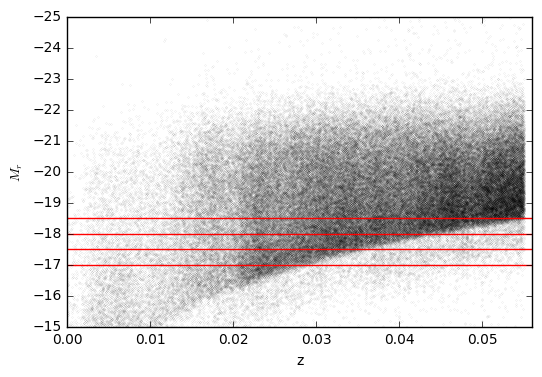

In [33]:
from matplotlib import rc

print len(re)
a = np.sort(re)
ind1 = np.where(re>0)[0]
print len(re[ind1])
re = re[ind1]
r = r[ind1]
f = f[ind1]
n = n[ind1]
u = u[ind1]
g = g[ind1]

print len (re), len(r)
xmin = np.min(re)
xmax = np.max(re)
ymin = np.min(r)
ymax = np.max(r)
print xmin,xmax,ymin,ymax

ind3 = np.where(r<=-18.0)[0]

x = [0,0.025,0.056]
line1 = [-18.0,-18.0,-18.0]
line2 = [-18.5,-18.5,-18.5]
line3 = [-17.5,-17.5,-17.5]
line4 = [-17.0,-17.0,-17.0]

plt.scatter(re,r, s = 0.001)
plt.plot(x,line1, color = 'r')
plt.plot(x,line2, color = 'r')
plt.plot(x,line3, color = 'r')
plt.plot(x,line4, color = 'r')

plt.ylim(-15.0,-25.0)
plt.yticks(np.linspace(-15.0, -25.0, 11))
plt.xlim(0,0.056)
plt.xlabel('z')
plt.ylabel(r'$M_{r}$')
plt.show()
plt.show()


In [35]:
indr = np.where(r<=-18.5)[0]
print len(r[indr])
rr = r[indr]
indr = np.where(rr>=-25.0)[0]
r = rr[indr]
print len(r)

95679
95679


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in log10


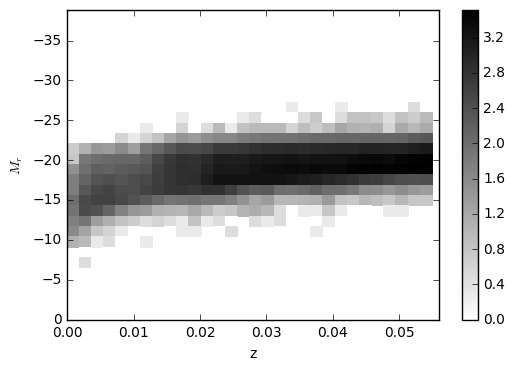

In [7]:
from scipy.stats import binned_statistic_2d

h = binned_statistic_2d(re,r,r,statistic = 'count',bins = (30,30))

yedges = h[1]
xedges = h[2]
xbins = [0.5*(h[1][i] + h[1][i+1]) for i in range(30)]
ybins = [0.5*(h[2][i] + h[2][i+1]) for i in range(30)]
extent = [xbins[0], xbins[-1], ybins[0], ybins[-1]]
number = np.ma.array(h[0], mask = h[0] == 0)
number = np.log10(number)

plt.pcolormesh(yedges,xedges,(np.transpose(number)),cmap = plt.cm.binary)
plt.colorbar()
plt.ylim(ymax, ymin)
plt.xlim(0,0.056)
plt.xlabel('z')
plt.ylabel(r'$M_{r}$')
plt.show()

In [8]:
indf = np.isfinite(f)
print min(f), max(f)
indf1 = np.where(f>=10)[0]
print len(f[indf1])

-31.6326 20.0403
16


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in log10


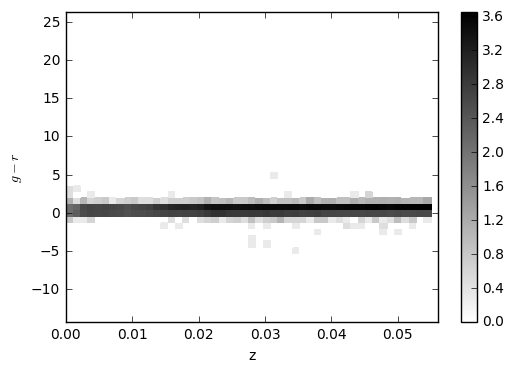

In [11]:

gr = [g[i]-r[i] for i in range(len(g))]
h = binned_statistic_2d(re,gr,gr,statistic = 'count',bins = (50,50))

yedges = h[1]
xedges = h[2]
xbins = [0.5*(h[1][i] + h[1][i+1]) for i in range(50)]
ybins = [0.5*(h[2][i] + h[2][i+1]) for i in range(50)]
extent = [xbins[0], xbins[-1], ybins[0], ybins[-1]]
number = np.ma.array(h[0], mask = h[0] == 0)
number = np.log10(number)

plt.pcolormesh(yedges,xedges,(np.transpose(number)),cmap = plt.cm.binary)
plt.colorbar()
plt.xlim(0,0.056)
plt.ylim(min(gr),max(gr))
plt.xlabel('z')
plt.ylabel(r'$g-r$')
plt.show()

In [13]:
indr = np.where(r>=-18.0)[0]
len(r[indr])

32847